In [1]:
# !pip install -r ../requirements.txt
# !apt-get update && apt-get install python3-opencv -y
# !pip install opencv-python

In [2]:
%config IPCompleter.use_jedi = False
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 99%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [6]:
import os
import glob
import pathlib
import multiprocessing as mp
from PIL import Image
from tqdm.auto import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
%matplotlib inline

In [ ]:
def png_to_jpg(img_path, output_folder):
    """Load png image and save it to jpg format to reduce size"""
    file_name = pathlib.Path(img_path).stem
    output_path = os.path.join(output_folder, f"{file_name}.jpg")
    img = Image.open(img_path).save(output_path)

In [ ]:
list_images = glob.glob("/data/Documents/Pastai/inputs/annotations/DATA_FINAL_task_bboxes-2021_05_16_18_45_42-pascal voc 1.1/JPEGImages/*.PNG")
output_path = "/data/Documents/Pastai/inputs/annotations/DATA_FINAL_task_bboxes-2021_05_16_18_45_42-pascal voc 1.1/jpg_converted_images"
os.makedirs(output_path, exist_ok=True)
list_args = [(p, output_path) for p in list_images]
print(len(list_images))

In [ ]:
%%time

with mp.Pool() as pool:
    pool.starmap(png_to_jpg, tqdm(list_args))

In [ ]:
for p1, p2 in tqdm(zip(sorted(list_images), sorted(glob.glob(os.path.join(output_path, "*.jpg"))))):
    assert Image.open(p1).size == Image.open(p2).size

In [31]:
tmp_im = cv2.imread("tmp.jpg")
cv2.rectangle(tmp_im, (148, 411), (504, 806),
              color=(0, 255, 0), thickness=3)
tmp_im_bis = cv2.cvtColor(tmp_im, cv2.COLOR_BGR2RGB)
im = Image.fromarray(tmp_im_bis)

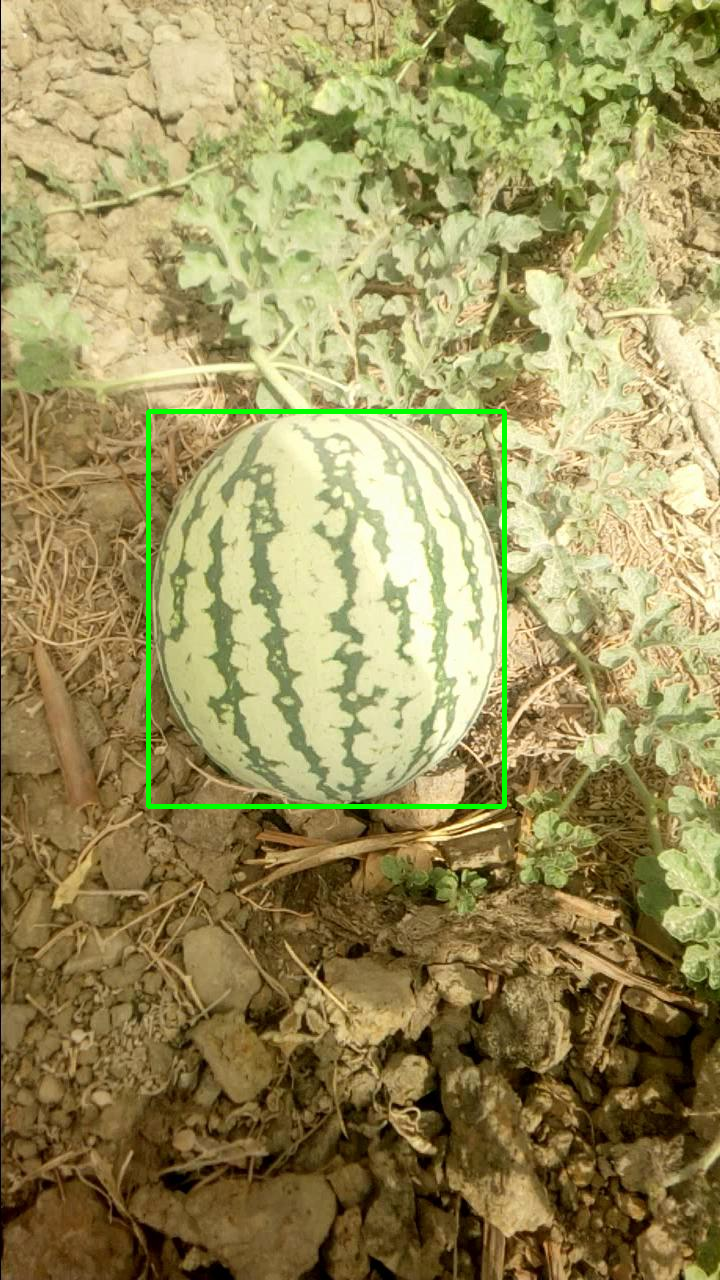

In [33]:
im